In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

In this `chapter/kernel`, you will be introduced to the fundamental `objects` in a `PostgreSQL database`: the `database`, `tables`, and `schemas`. 

After completing this chapter, you will know how to issue commands to create all `three types of objects`, and understand how each fits into the `hierarchy` of `PostgreSQL objects`.

[Here](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/SQL%20practices/Track:%20SQL%20for%20Database%20Administrators/Course3:%20Structure%20of%20PostgreSQL%20Databases/readme) is the `course discription!`

## 1. Creating a database.

### 1.1. The PostgreSQL database management system.
- object relational database management system
- system component are objects
- database is top-level object.

#### Database management command.
**`Syntax`.**

                CREATE DATABASE your_db_name
**Right (valid name).**

                -- name beginning with a letter
                CREATE DATABASE my_db;
                
                -- name beginning by an underscore or contain number
                CREATE DATABASE _my_db1;
**Wrong (invalid name)**

                -- name starting with a number
                CREATE DATABASE 1991_db;
                
### 1.2. EXERCISEs.

#### Exercise 1.1. New database creation
Created in 1953, the `U.S. Small Business Administration (SBA)` helps small business owners and entrepreneurs pursue the American dream. The `SBA` is a federal agency dedicated to small business and provides counseling, capital, and contracting expertise for small businesses. This important agency publishes a lot of interesting data about the work that it does. Making capital available to small businesses through various loan programs is an important responsibility of the `SBA`. We will be focusing on this particular function of the organization throughout this course as we build a `PostgreSQL` database to store this data.

**Question.** Examine the commands listed below and select the **correct command to create a valid `SBA` database**.

A. `CREATE DATABASE 1953_small_business_administration;`

B. `CREATE DATABASE united_states_small_business_administration;`

C. `CREATE DATABASE sba;`

**Answer & comments!**

*A. Wrong!!* This name pays homage to the founding of the `SBA` but is **not valid** because it **begins with a digit**.

*B. Incorrect!!* This name is very **accurate but is too long** for the `default settings` in `PostgreSQL`.

**C. Correct!!!** This name is ***short, simple, and most importantly valid***. We will be using the `sba database` throughout this [course](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/tree/master/SQL%20practices/Track:%20SQL%20for%20Database%20Administrators/Course3:%20Structure%20of%20PostgreSQL%20Databases).

#### Exercise 1.2. Motivation for a new database
You have seen some motivations for creating a new `database`. Let's think about some additional scenarios that might motivate someone to create a `PostgreSQL` database for organizing information.

Examine the scenarios below and *select the one which is* ***least likely*** *to warrant the creation of a new `database`*.

A. A doctor's office wants to organize a filing cabinet of patient records in an electronic format.

B. You generate a strong-password to be used to sign in to all of your favorite sites and want to store it somewhere in case you forget.

C. A residential management company wants to store information about tenants and apartments across 55 properties which they own.

D. A restaurant wants to implement a customer loyalty program and needs to keep track of customer visits and orders.

**Answers & comments!**

*A. Wrong!!* This is a great reason to create a database as paper records are susceptible to being lost or damaged.

**B. Correct!!!** A `database` should be used to store more than one piece of information. There are simpler options than creating a database for this use.

*C. Wrong!!* Managing 55 properties with information on the apartments and tenants in each building can get cumbersome quickly, so managing this information in a database would be a great solution.

*D. Incorrect!!* Rather than storing information on customer's and their dining preferences by examining receipts, a database that automatically gets updated with this information as service is rendered would work quite well.

## 2. Creating tables.

### The database tables.
- Variable number of rows
- Fixed number of columns (structure can be altered)
- Columns have specific data-types
- Each row is a record.

#### The `CREATE TABLE` command.
**`Syntax.`**

                    CREATE TABLE table_name(
                                              column1_name  column1_datatype  [col1_constraints],
                                              column2_name  column2_datatype  [col2_constraints],
                                                  ....                                     ....  ,
                                              columnM_name  columnM_datatype  [colM_constraints],
                                              );
**Name restriction.**
- **maximum length** of 31 characters
- **must begin with** a letter or an underscore `_`.

### Examples.
#### Table 1.
            
                CREATE TABLE school(
                                    id  serial  PRIMARY KEY,
                                    name  TEXT  NOT NULL,
                                    matscot_name TEXT
                                    );
#### Table 2.                    
            
                CREATE TABLE topic(
                                    id  SERIAL  PRIMARY KEY,
                                    description  TEXT  NOT NULL,
                                   );
### Table organization.
- Which field shoud I use?
- How many table should I add?
- Which data-types are the best to use for the field of my table.

### EXERCISEs

#### Exercise 2.1. Name that table
Like all named objects in `PostgreSQL`, table names have certain restrictions as discussed in the previous lecture. To avoid issues when creating new tables, you should recognize which naming conventions are not allowed.

Look at these following command lines:

            -- Delete me and command below if this table name is invalid
            CREATE TABLE 2for1 ();

            -- Delete me and command below if this table name is invalid
            CREATE TABLE customers ();

            -- Delete me and command below if this table name is invalid
            CREATE TABLE orders ();

            -- Delete me and command below if this table name is invalid
            CREATE TABLE service_rendered_by_other_provider ();
**Question.** Delete the **`CREATE TABLE`** `commands` above which contain ***invalid table names***.

**SOLUTION.**

                    CREATE TABLE customers ();

                    CREATE TABLE orders ();
**Comment.** Again, remember not naming the database too long; or beginning with a digit!!

#### Exercise 2.2. Two tables and a foreign key connection
The `Small Business Association (SBA)` captures a large amount of data on their loan programs and releases it publicly. Some of the available data includes details on the applicant (including name and address) and how the business is organized (the business type). As you are developing your project to better understand characteristics behind which loans are approved and which are rejected, you suspect that details about the applicant and business type will be important to include in your analysis.

Three business types are defined. These types are `"Individual"`, `"Partnership"`, and `"Corporation"`. You ultimately want to associate the applicant and the business type for which she is seeking a loan. You will create new tables in the sba database for this data.

#### Instructions.
**Step 1.** Create a new table named `business_type` which includes a unique identifier field named `id` and a text field named `description`.

**SOLUTION.**

                CREATE TABLE business_type (
                    id serial PRIMARY KEY,
                    description TEXT NOT NULL
                );
**Step 2.** Create an `applicant` table which includes a `unique identifier` field `id`, a `text` field `name`, a `character` field `zip_code`, and a `foreign key`: `business_type_id`.

**SOLUTION.**

                CREATE TABLE business_type (
                    id serial PRIMARY KEY,
                    description TEXT NOT NULL
                );

                -- Define the applicant table below
                CREATE TABLE applicant (
                    id serial PRIMARY KEY,
                    name TEXT NOT NULL,
                    zip_code CHAR(5) NOT NULL,
                    business_type_id INTEGER references business_type(id)
                );
**Comment.** You just added your first two tables to the `SBA database` and succesfully built the relationship between them using a [FOREIGN KEY](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/SQL%20practices/Track:%20SQL%20for%20Database%20Administrators/Course1:%20Introduction%20to%20Relational%20Databases%20in%20SQL/uniquely-indentify-records-with-key-constraints.ipynb). In the next chapter, you will learn how to define tables more completely with a deeper exploration of different data types in `PostgreSQL` and how to use them.

## 3. Creating schemas

#### PostgreSQL schemas.
A named container for tables

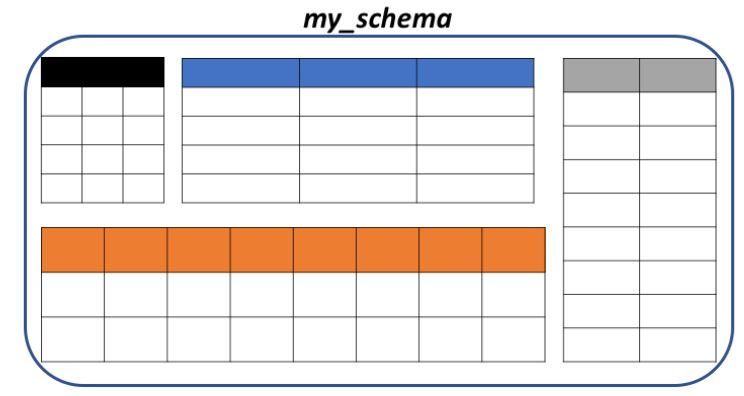

In [2]:
display(Image(r"C:\Users\Admin\Desktop\fig1.JPG", width=400, unconfined=True))

#### Schema uses.
- **Providing** `database users` with `seperate environments`.

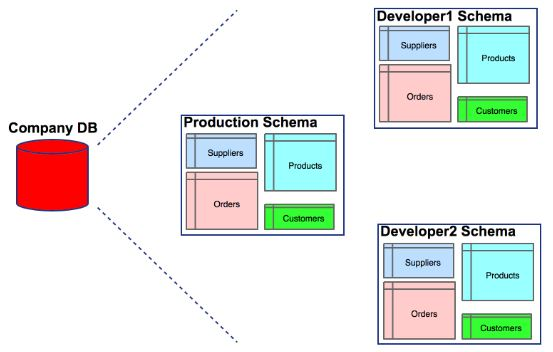

In [4]:
display(Image(r"C:\Users\Admin\Desktop\fig2.JPG", width=500, unconfined=True))

- **Organizing** `database objects` into **related groups**

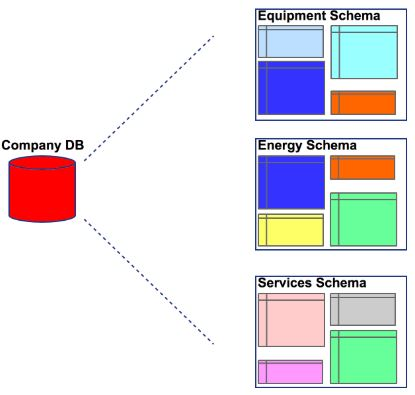

In [5]:
display(Image(r"C:\Users\Admin\Desktop\fig3.JPG", width=500, unconfined=True))

### The `default schema`.
- The `public` schema is `default schema` in the `PostgreSQL`

            CREATE TABLE topic (
                                 id SERIAL PRIMARY KEY,
                                 description TEXT NOT NULL
                                );

How to call? `public.topic`

#### The `CREATE SCHEMA` command.
**`Syntax`.**
        
                CREATE SCHEMA schema_name;
                CREATE TABLE schema_name.branches(...);
**Example.**

                CREATE SCHEMA division1;
                
                CREATE TABLE division.school(
                                              id SERIAL PRIMARY KEY,
                                              name TEXT NOT NULL,
                                              macscot_name TEXT,
                                              num_scholarships INTEGER DEFAULT 0
                                                );
**`Schema naming restrictions`.**
- Length of name less than 32.
- Name begins with a letter or an `underscore:` `_`
- `schema name` ***cannot begin with `pg_`***.

### EXERCISEs.
#### Exercise 3.1. User-level schemas
An important use-case for `PostgreSQL schemas` is the ability to provide database users with their own group of tables that are only accessible to each individual user, such that `users' database` access does not interfere with others. In the name of security, this can be taken one step further to separate any production tables from being manipulated by unauthorized users. `Schemas` allow these divisions to be created without the use of multiple databases which can reduce maintenance requirements for `database administrators`.

#### Instructions
Create 3 schemas, one for `web developer` **`Ann Simmons`**, one for data analyst **`Ty Beck`**, and one for production data (named `production`). Use a `name_lastname` format to name the `employee schemas`.

**SOLUTION.**

                -- Add a schema for Ann Simmons
                CREATE SCHEMA ann_simmons;

                -- Add a schema for Ty Beck
                CREATE SCHEMA ty_beck;

                -- Add a schema for production data
                CREATE SCHEMA production;
**Comment.** You created a `schema` for each team member as well as a `schema` to hold `production data`. In later lessons, you will learn how to control access to `schemas` to ***prevent unauthorized access to the data in protected `schemas`***.

#### Exercise 3.2.  The public schema
The `public` `schema` of a `PostgreSQL database` is created by default when a new `database` is created. All users by `default` have access to this `schema` unless this access is explicitly restricted. When a `database` is going to be used by a single user and does not have complex groupings of `data objects` beyond what can naturally be supported by an object-relational database, the public schema will usually suffice. No additional `schemas` need to be added to such a `database`. This exercise will help to reinforce the idea that the public schema can be ignored in most basic usage of `PostgreSQL`.

#### Instructions
Imagine that you are currently using the `pod` database described in previous lessons. Create a table named `users` (to represent listeners of podcasts on the platform) to the `pod` database such that it is added to the `public` schema.

**SOLUTION.**

                    -- Add users table to the public schema for the pod database
                    CREATE TABLE users (
                                          id serial PRIMARY KEY,
                                          first_name TEXT NOT NULL,
                                          last_name TEXT NOT NULL,
                                          email TEXT NOT NULL,
                                          hashed_password CHAR(72) NOT NULL
                                        );
**Comment.** Remember that, by `default`, newly created tables are added to the `public schema` without the need to explicitly specify the `schema`. Therefore, using either users or `public.users` as the `schema name` is equally valid. But why not save yourself some effort typing?

#### Exercise 3.3.  Creating tables in existing schemas
The `SBA` provides twelve different funding opportunities. 

Two popular programs are the `7a` and `504 programs`. 

These `loans` have different purposes where 
> `504 loans` are typically used for real estate purchases and 

> `7a loans` are typically for general business needs. 

You have been tasked with the creation of `tables` which share a name but allow for different structures within their respective schemas. The schemas for these loans have already been created for you (named `loan_7a` and `loan_504`, respectively).

You will now put your knowledge to use to add new tables to these existing `schemas`.

#### Instructions
**Step 1.** Create a `bank` table in the `loan_504 schema` consisting of `id` and `name` (max of 100 characters) columns.

**SOLUTION.**

                -- Create a table named 'bank' in the 'loan_504' schema
                CREATE TABLE loan_504.bank (
                                             id serial PRIMARY KEY,
                                             name VARCHAR (100) NOT NULL
                                            );

**Step 2.** Replicate the columns of the `loan_504.bank` table in the `loan_7a schema` adding an `express_provider` `boolean` column.

**SOLUTION.**

                -- Create a table named 'bank' in the 'loan_7a' schema
                CREATE TABLE loan_7a.bank (
                                            id SERIAL PRIMARY KEY,
                                            name VARCHAR (100) NOT NULL,
                                            express_provider BOOLEAN
                                            );

**Step 3.** Create a `borrower` table in the `loan_504 schema` with `id` and `full_name` (max of 100 characters) columns.

**SOLUTION.**

                -- Create a table named 'borrower' in the 'loan_504' schema
                CREATE TABLE loan_504.borrower (
                                                id SERIAL PRIMARY KEY,
                                                full_name VARCHAR (100) NOT NULL
                                                );

**Step 4.** Replicate the columns of the `loan_504.borrower` table in the `loan_7a schema` by adding an `individual` `boolean` column.

**SOLUTION.**

                -- Create a table named 'borrower' in the 'loan_7a' schema
                CREATE TABLE loan_7a.borrower(
                                               id serial PRIMARY KEY,
                                               full_name VARCHAR (100) NOT NULL,
                                               individual BOOLEAN
                                              );